Trūkstamų reikšmių skaičius kiekviename stulpelyje:
Time        0
BEN      7772
CH4     32569
CO        435
EBE      7835
NMHC    32649
NO        706
NO2       700
NOx       704
O3       1725
PM10     4393
PM25    66570
SO2       767
TCH     32571
TOL      8139
dtype: int64

Po trūkstamų reikšmių tvarkymo:
Time    0
BEN     0
CH4     0
CO      0
EBE     0
NMHC    0
NO      0
NO2     0
NOx     0
O3      0
PM10    0
PM25    0
SO2     0
TCH     0
TOL     0
dtype: int64

Tvarkyti duomenys:
                             Time   BEN      CH4   CO  EBE      NMHC     NO  \
0       2001-01-01 00:00:00+00:00   4.0  1.00045  0.0  2.0  0.002208   66.0   
1       2001-01-01 01:00:00+00:00   9.0  1.00045  0.0  5.0  0.002208  146.0   
2       2001-01-01 02:00:00+00:00   9.0  1.00045  0.0  5.0  0.002208  190.0   
3       2001-01-01 03:00:00+00:00  10.0  1.00045  0.0  5.0  0.002208  170.0   
4       2001-01-01 04:00:00+00:00   8.0  1.00045  0.0  4.0  0.002208  102.0   
...                           ...  

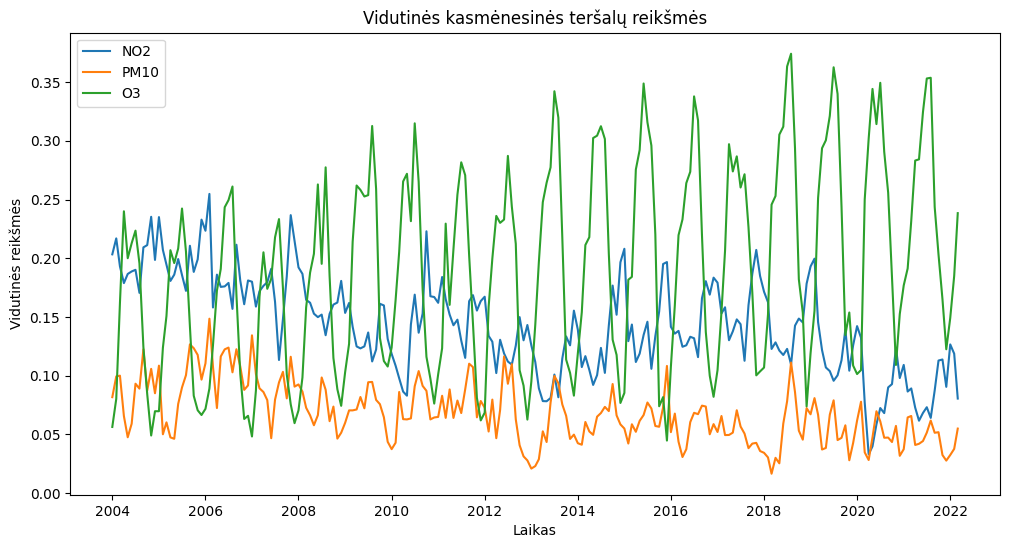

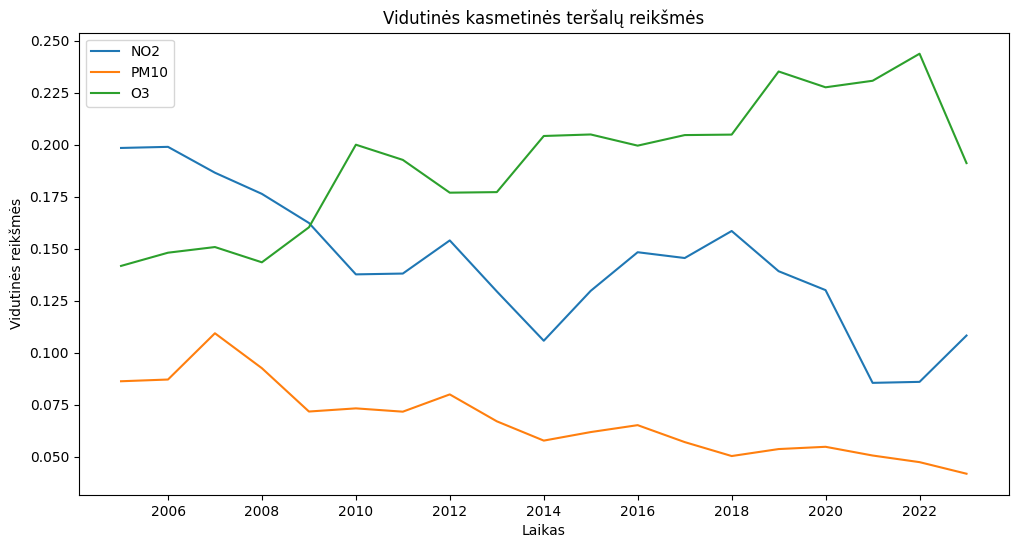

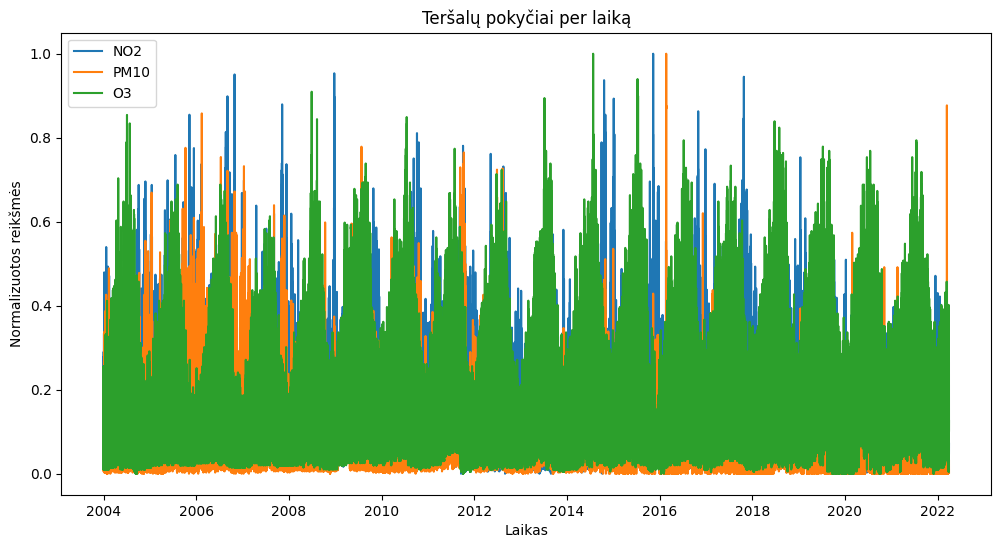


Pasikartojimų dažnis:
           NO2    PM10     O3
0.000000   7.0  1115.0  159.0
0.002732   0.0  1282.0    0.0
0.002740  24.0     0.0    0.0
0.005025   0.0     0.0  864.0
0.005464   0.0  1948.0    0.0
...        ...     ...    ...
0.945205   1.0     0.0    0.0
0.950685   1.0     0.0    0.0
0.953425   1.0     0.0    0.0
0.964481   0.0     1.0    0.0
1.000000   1.0     1.0    1.0

[752 rows x 3 columns]

Teršalų koreliacijų matrica:
           NO2      PM10        O3
NO2   1.000000  0.555111 -0.576296
PM10  0.555111  1.000000 -0.206227
O3   -0.576296 -0.206227  1.000000


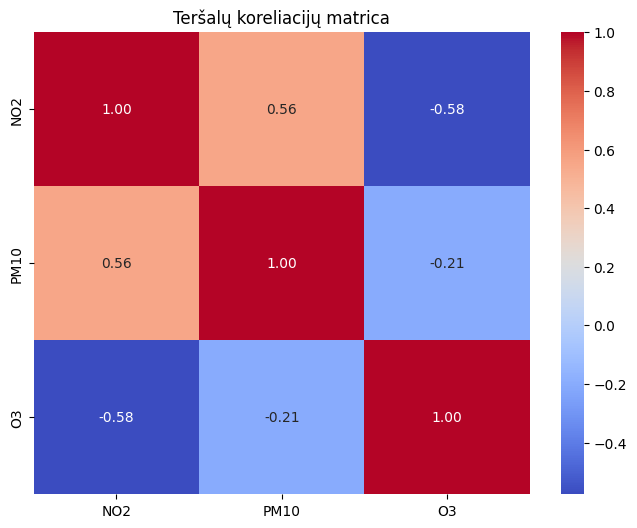


Pastabos:

1. Teršalų pokyčiai per laiką rodo sezoninius svyravimus.
2. Nustatyta, kad kai kurie teršalai yra stipriai koreliuojami tarpusavyje.
3. Normalizavus teršalų reikšmes, galima lengviau palyginti jų pokyčius.
4. Analizuojant koreliacijų matricą, galima pastebėti, kad NO2 ir PM10 yra labiausiai koreliuojami.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

data = pd.read_csv("C:/Users/Silver/Downloads/MadridPolution2001-2022.csv")

print("Trūkstamų reikšmių skaičius kiekviename stulpelyje:")
print(data.isnull().sum())

numeric_cols = data.select_dtypes(include=[np.number]).columns  
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean()) 
print("\nPo trūkstamų reikšmių tvarkymo:")
print(data.isnull().sum())

print("\nTvarkyti duomenys:")
print(data)

data['Time'] = pd.to_datetime(data['Time'])
data = data[data['Time'].dt.year >= 2004]
pollutant_columns = ['NO2', 'PM10', 'O3']  
data[pollutant_columns] = (data[pollutant_columns] - data[pollutant_columns].min()) / (data[pollutant_columns].max() - data[pollutant_columns].min())


daily_means = data.resample('D', on='Time')[pollutant_columns].mean()
monthly_means = data.resample('MS', on='Time')[pollutant_columns].mean()  
annual_means = data.resample('YE', on='Time')[pollutant_columns].mean()  

print("\nVidutinės kasdienės teršalų reikšmės:")
print(daily_means)
print("\nVidutinės kasmėnesinės teršalų reikšmės:")
print(monthly_means)
print("\nVidutinės kasmetinės teršalų reikšmės:")
print(annual_means)


def plot_means(means, title):
    plt.figure(figsize=(12, 6))
    for column in pollutant_columns:
        plt.plot(means.index, means[column], label=column)
    plt.title(title)
    plt.xlabel('Laikas')
    plt.ylabel('Vidutinės reikšmės')
    plt.legend()
    plt.show()

plot_means(monthly_means, 'Vidutinės mėnesinės teršalų reikšmės')
plot_means(annual_means, 'Vidutinės metinės teršalų reikšmės')

plt.figure(figsize=(12, 6))
for column in pollutant_columns:
    plt.plot(data['Time'], data[column], label=column)
plt.title('Teršalų pokyčiai per laiką')
plt.xlabel('Laikas')
plt.ylabel('Normalizuotos reikšmės')
plt.legend()
plt.show()

repetition_counts = data[pollutant_columns].apply(lambda x: x.value_counts()).fillna(0)
correlation_matrix = data[pollutant_columns].corr()

print("\nPasikartojimų dažnis:")
print(repetition_counts)
print("\nTeršalų koreliacijų matrica:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Teršalų koreliacijų matrica')
plt.show()

observations = """
1. Teršalų pokyčiai per laiką rodo sezoninius svyravimus.
2. Nustatyta, kad kai kurie teršalai yra stipriai koreliuojami tarpusavyje.
3. Analizuojant koreliacijų matricą, galima pastebėti, kad NO2 ir PM10 yra labiausiai koreliuojami.
"""

print("\nPastabos:")
print(observations)